Сравнение времени обычного и блочного транспонирования матрицы n=15000

transpose time: 1.99474 s.

block transpose time: 1.84714 s, block_size = 10

Попробуем найти оптимальные размеры блоков для блочного перемножения матриц n=1024

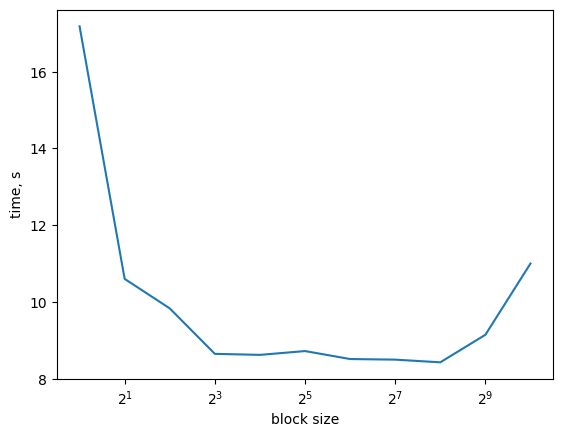

In [6]:
import matplotlib.pyplot as plt
bs = [1,       2,       4,       8,       16,     32,      64,      128,     256,     512,     1024]
bl = [17.1847, 10.601,  9.83237, 8.64692, 8.6206, 8.71972, 8.51207, 8.49634, 8.42639, 9.14445, 11.0014]

plt.plot(bs, bl)
plt.xlabel("block size")
plt.ylabel("time, s")
plt.xscale("log", base=2)

За оптимальный размер блока примем block_size=64.

Теперь найдём оптимальный threshold для алгоритма Штрассена, при котором будем переходить на обычный $n^3$ алгоритм.

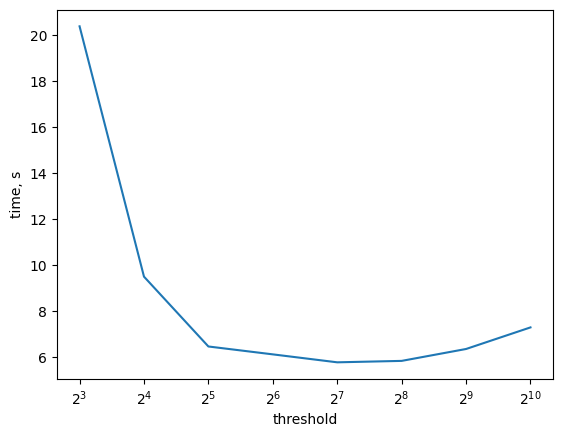

In [4]:
td = [8,       16,      32,      64,      128,     256,     512,     1024]
st = [20.3749, 9.50572, 6.47331, 6.13119, 5.78571, 5.84804, 6.36465, 7.30207]

plt.plot(td, st)
plt.xlabel("threshold")
plt.ylabel("time, s")
plt.xscale("log", base=2)

Прниятые параметры: block_size=64, threshold=128.

Сравнение реализованных алгоритмов: обычное умножение, транспонирование правого сомножителя, блочное перемножение, блочное перемножение с транспонированием, алгоритм Штрассена.

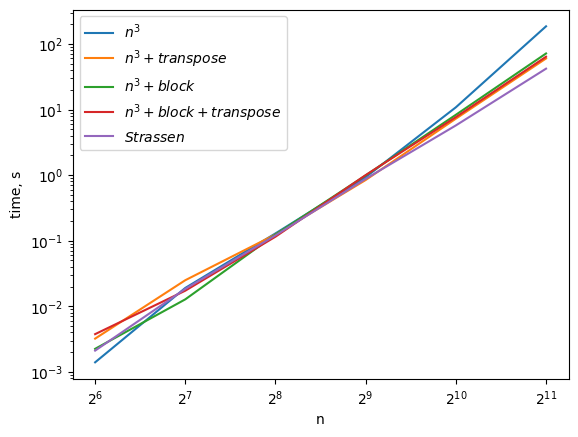

Наклон прямой для алгоритма Штрассена k = 2.83110386976236


In [20]:
N =     [64,            128,        256,        512,        1024,       2048]
n3 =    [0.00140146,    0.0190887,  0.129321,   0.931388,   10.8168,    185.596]
n3tr =  [0.00322068,    0.0250329,  0.124665,   0.843104,   7.25912,    60.0307]
n3bl =  [0.00225103,    0.0127896,  0.12443,    0.990528,   8.31613,    71.5343]
n3bt =  [0.00376851,    0.0173324,  0.115311,   1.00181,    7.67196,    63.8029]
st =    [0.00211315,    0.018443,   0.120788,   0.87866,    5.72694,    41.9804]

plt.plot(N, n3, label="$n^3$")
plt.plot(N, n3tr, label="$n^3 + transpose$")
plt.plot(N, n3bl, label="$n^3 + block$")
plt.plot(N, n3bt, label="$n^3 + block + transpose$")
plt.plot(N, st, label="$Strassen$")
plt.xlabel("n")
plt.ylabel("time, s")
plt.xscale("log", base=2)
plt.yscale("log")
plt.legend()
plt.show()

import numpy as np
from math import log

k, b = np.polyfit(np.array([log(x) for x in N]), np.array([log(x) for x in st]), 1)
print(f"Наклон прямой для алгоритма Штрассена k = {k}")

Аналогичные измерения но с использованием mpi parallel for для 8 потоков

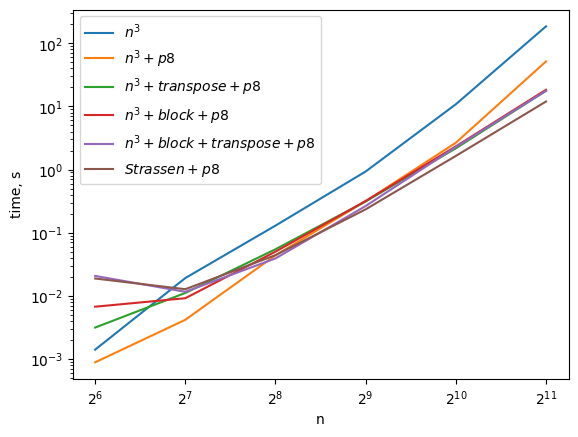

Наклон прямой для n^3 алгоритма k = 3.1421909819913005
Наклон прямой для алгоритма Штрассена k = 2.8368831955479297


In [29]:
N =     [64,            128,        256,        512,        1024,       2048]
n3p8 =  [0.000882808,   0.00416501, 0.0438107,  0.315187,   2.65829,    51.6099]
n3tr =  [0.0031376,     0.0110873,  0.0545902,  0.311741,   2.16919,    17.6774]
n3bl =  [0.0067144,     0.00914928, 0.0500047,  0.317599,   2.32862,    18.365]
n3bt =  [0.0206371,     0.0115621,  0.0390695,  0.264397,   2.27737,    17.693]
st =    [0.018781,      0.0127105,  0.0440266,  0.234288,   1.64354,    11.9598]

plt.plot(N, n3, label="$n^3$")
plt.plot(N, n3p8, label="$n^3 + p8$")
plt.plot(N, n3tr, label="$n^3 + transpose + p8$")
plt.plot(N, n3bl, label="$n^3 + block + p8$")
plt.plot(N, n3bt, label="$n^3 + block + transpose + p8$")
plt.plot(N, st, label="$Strassen + p8$")
plt.xlabel("n")
plt.ylabel("time, s")
plt.xscale("log", base=2)
plt.yscale("log")
plt.legend()
plt.show()

k, b = np.polyfit(np.array([log(x) for x in N[0:]]), np.array([log(x) for x in n3p8[0:]]), 1)
print(f"Наклон прямой для n^3 алгоритма k = {k}")
k, b = np.polyfit(np.array([log(x) for x in N[3:]]), np.array([log(x) for x in st[3:]]), 1)
print(f"Наклон прямой для алгоритма Штрассена k = {k}")

Используем AVX512 для оптимизации

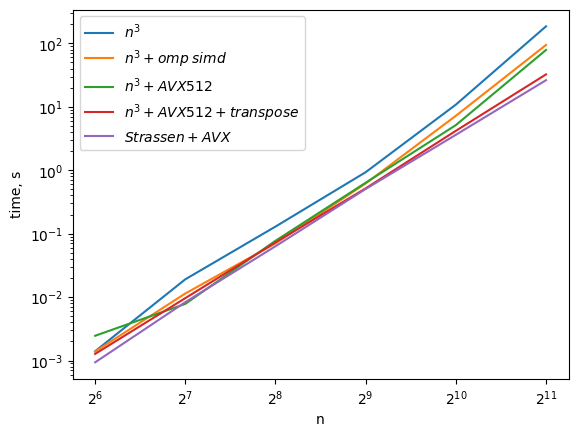

Наклон прямой для алгоритма Штрассена k = 2.8482709806554953


In [34]:
N =         [64,            128,        256,        512,        1024,       2048]
n3omp =     [0.00138593,    0.0114098,  0.0703193,  0.618683,   7.2135,     94.372]
n3avx =     [0.00245855,    0.00782174, 0.0772397,  0.634952,   5.14769,    78.7462]
n3atr =     [0.00127165,    0.00962989, 0.0728231,  0.517907,   4.18172,    32.4211]
st_avx =    [0.000937431,   0.0083252,  0.0634011,  0.506829,   3.6187,     26.284]

plt.plot(N, n3, label="$n^3$")
plt.plot(N, n3omp, label="$n^3 + omp \\; simd$")
plt.plot(N, n3avx, label="$n^3 + AVX512$")
plt.plot(N, n3atr, label="$n^3 + AVX512 + transpose$")
plt.plot(N, st_avx, label="$Strassen + AVX$")
plt.xlabel("n")
plt.ylabel("time, s")
plt.xscale("log", base=2)
plt.yscale("log")
plt.legend()
plt.show()

k, b = np.polyfit(np.array([log(x) for x in N[3:]]), np.array([log(x) for x in st_avx[3:]]), 1)
print(f"Наклон прямой для алгоритма Штрассена k = {k}")

И, наконец, AVX512 на 8 потоках.

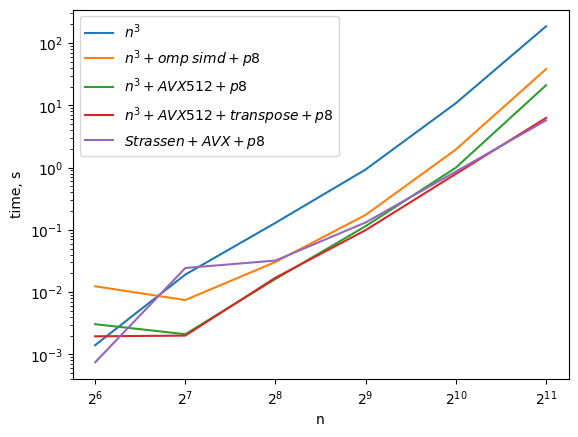

Наклон прямой для алгоритма Штрассена k = 2.7224909652298215


In [ ]:
N =         [64,            128,        256,        512,        1024,       2048]
n3omp =     [0.012361,      0.00743865, 0.030439,   0.173806,   1.94894,    38.1556]
n3avx =     [0.00304365,    0.00210248, 0.0162123,  0.114525,   0.995727,   20.9867]
n3atr =     [0.00194451,    0.00199643, 0.0170078,  0.0988776,  0.791154,   6.26519]
st_avx =    [0.000743014,   0.0243347,  0.0320677,  0.131304,   0.861124,   5.7198]

plt.plot(N, n3, label="$n^3$")
plt.plot(N, n3omp, label="$n^3 + omp \\; simd + p8$")
plt.plot(N, n3avx, label="$n^3 + AVX512 + p8$")
plt.plot(N, n3atr, label="$n^3 + AVX512 + transpose + p8$")
plt.plot(N, st_avx, label="$Strassen + AVX + p8$")
plt.xlabel("n")
plt.ylabel("time, s")
plt.xscale("log", base=2)
plt.yscale("log")
plt.legend()
plt.show()

k, b = np.polyfit(np.array([log(x) for x in N[3:]]), np.array([log(x) for x in st_avx[3:]]), 1)
print(f"Наклон прямой для алгоритма Штрассена k = {k}")

### Оценим результаты для n=2048

Наивный алгоритм: 185.596 с.

Транспонирование: 60.031 с.

Штрассен: 41.980 с.

### С использованием AVX512

omp simd: 94.372 с.

AVX512: 78.746 с.

Транспонирование: 32.421 с.

Штрассен: 26.284 с.

### AVX512 на 8 потоках OpenMP

omp simd: 38.155 с.

AVX512: 20.986 с.

Транспонирование: 6.265 с.

Штрассен: 5.719 с.